# Export Performance Analysis - Phân tích Hiệu suất Xuất khẩu Cà phê Việt Nam 2005-2024

Bảng `export_performance` tổng hợp các chỉ số hiệu suất xuất khẩu:
- **Area** (area_thousand_ha) - Diện tích trồng (nghìn ha)
- **Production** (production_tons) - Tổng sản lượng (tấn)
- **Export Volume** (export_tons) - Lượng xuất khẩu (tấn)
- **Export Value** (export_value_million_usd) - Giá trị xuất khẩu (triệu USD)
- **World Price** (price_world_usd_per_ton) - Giá thế giới (USD/tấn)
- **Vietnam Price** (price_vn_usd_per_ton) - Giá Việt Nam (USD/tấn)

In [7]:
# Import libraries
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [8]:
# Load environment variables
load_dotenv()

DB_HOST = os.getenv('HOST')
DB_PORT = int(os.getenv('PORT', 3306))
DB_USER = os.getenv('USER')
DB_PASSWORD = os.getenv('PASSWORD')
DB_NAME = os.getenv('DB', 'defaultdb')

print(f"Connecting to {DB_HOST}:{DB_PORT}/{DB_NAME}")

Connecting to ady201-team7-ady201.e.aivencloud.com:19034/defaultdb


In [9]:
# Connect to database
connection = pymysql.connect(
    host=DB_HOST,
    port=DB_PORT,
    user=DB_USER,
    password=DB_PASSWORD,
    database=DB_NAME,
    cursorclass=pymysql.cursors.DictCursor
)

print("✓ Connected to database")

✓ Connected to database


In [ ]:
# Load data from export_performance table
query = """
SELECT 
    year,
    area_thousand_ha,
    production_tons,
    export_tons,
    export_value_million_usd,
    price_world_usd_per_ton,
    price_vn_usd_per_ton
FROM export_performance
WHERE year >= 2005 AND year <= 2024
ORDER BY year
"""

df = pd.read_sql(query, connection)

print(f"Loaded {len(df)} rows from export_performance table")
print("\nData preview:")
df.head()

C:\Users\15112\AppData\Local\Temp\ipykernel_6264\1734254053.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


DatabaseError: Execution failed on sql '
SELECT 
    year,
    area_thousand_ha,
    production_tons,
    export_tons,
    export_value_million_usd,
    price_world_usd_per_ton,
    price_vn_usd_per_ton
FROM coffee_summary
WHERE year >= 2005 AND year <= 2024
ORDER BY year
': (1146, "Table 'defaultdb.coffee_summary' doesn't exist")

: 

In [ ]:
# Data info
print("Data Information:")
df.info()

print("\n" + "="*60)
print("Statistical Summary:")
print("="*60)
df.describe()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      20 non-null     object
 1   area_thousand_ha          20 non-null     object
 2   production_tons           20 non-null     object
 3   export_tons               20 non-null     object
 4   export_value_million_usd  20 non-null     object
 5   price_world_usd_per_ton   20 non-null     object
 6   price_vn_usd_per_ton      20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB

Statistical Summary:


,year,area_thousand_ha,production_tons,export_tons,export_value_million_usd,price_world_usd_per_ton,price_vn_usd_per_ton
count,20,20,20,20,20,20,20
unique,1,1,1,1,1,1,1
top,year,area_thousand_ha,production_tons,export_tons,export_value_million_usd,price_world_usd_per_ton,price_vn_usd_per_ton
freq,20,20,20,20,20,20,20


## 1. Export Performance Overview - Tổng quan Hiệu suất Xuất khẩu

TypeError: unsupported operand type(s) for /: 'str' and 'int'

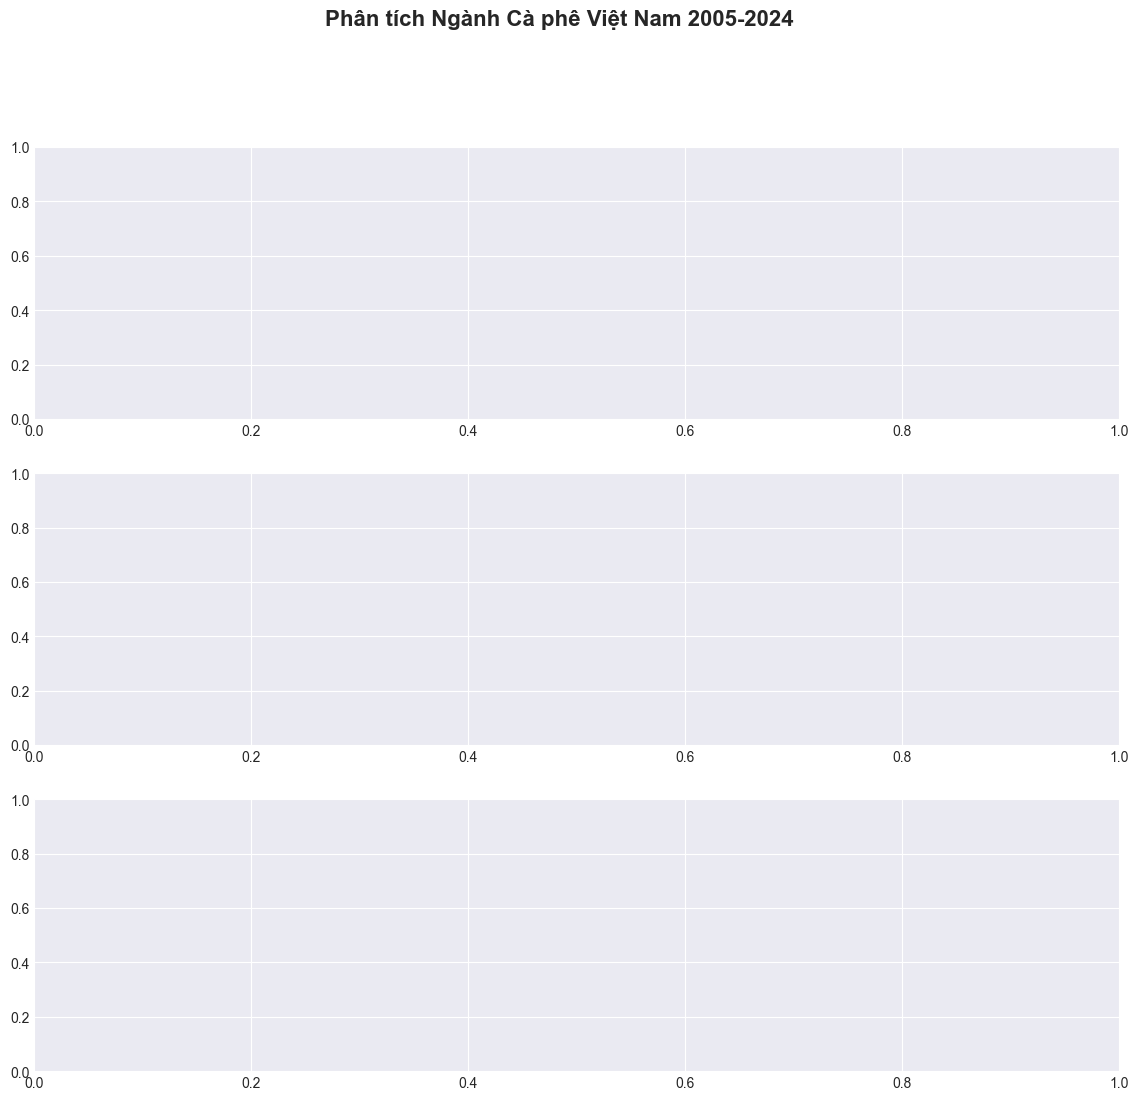

In [ ]:
# Create comprehensive Export Performance chart
fig, axes = plt.subplots(4, 1, figsize=(16, 16))
fig.suptitle('Export Performance Dashboard - Bảng Hiệu Suất Xuất Khẩu Cà Phê Việt Nam 2005-2024', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 1: Area (Diện tích)
df_area = df[df['area_thousand_ha'].notna()]
axes[0].plot(df_area['year'], df_area['area_thousand_ha'], 
             marker='o', linewidth=2.5, markersize=6, color='#27ae60', label='Area')
axes[0].fill_between(df_area['year'], df_area['area_thousand_ha'], alpha=0.3, color='#27ae60')
axes[0].set_title('Coffee Growing Area - Diện tích Trồng Cà Phê', fontsize=13, fontweight='bold', pad=10)
axes[0].set_ylabel('Thousand ha (nghìn ha)', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper left', fontsize=10)

# Add value labels
for x, y in zip(df_area['year'], df_area['area_thousand_ha']):
    if x % 3 == 0:
        axes[0].text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

# Plot 2: Production (Sản lượng)
df_prod = df[df['production_tons'].notna()]
axes[1].plot(df_prod['year'], df_prod['production_tons']/1000, 
             marker='s', linewidth=2.5, markersize=6, color='#2ecc71', label='Production')
axes[1].fill_between(df_prod['year'], df_prod['production_tons']/1000, alpha=0.3, color='#2ecc71')
axes[1].set_title('Coffee Production - Sản Lượng Cà Phê', fontsize=13, fontweight='bold', pad=10)
axes[1].set_ylabel('Thousand tons (nghìn tấn)', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='upper left', fontsize=10)

# Add value labels
for x, y in zip(df_prod['year'], df_prod['production_tons']/1000):
    if x % 3 == 0:
        axes[1].text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Export Volume (Lượng xuất khẩu)
df_export = df[df['export_tons'].notna()]
axes[2].plot(df_export['year'], df_export['export_tons']/1000, 
             marker='D', linewidth=2.5, markersize=6, color='#3498db', label='Export Volume')
axes[2].fill_between(df_export['year'], df_export['export_tons']/1000, alpha=0.3, color='#3498db')
axes[2].set_title('Export Volume - Lượng Xuất Khẩu', fontsize=13, fontweight='bold', pad=10)
axes[2].set_ylabel('Thousand tons (nghìn tấn)', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].legend(loc='upper left', fontsize=10)

# Add value labels
for x, y in zip(df_export['year'], df_export['export_tons']/1000):
    if x % 3 == 0:
        axes[2].text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

# Plot 4: Export Value (Giá trị xuất khẩu)
df_value = df[df['export_value_million_usd'].notna()]
axes[3].plot(df_value['year'], df_value['export_value_million_usd'], 
             marker='^', linewidth=2.5, markersize=7, color='#e74c3c', label='Export Value')
axes[3].fill_between(df_value['year'], df_value['export_value_million_usd'], alpha=0.3, color='#e74c3c')
axes[3].set_title('Export Value - Giá Trị Xuất Khẩu (Kim Ngạch)', fontsize=13, fontweight='bold', pad=10)
axes[3].set_xlabel('Year (Năm)', fontsize=11, fontweight='bold')
axes[3].set_ylabel('Million USD (triệu USD)', fontsize=11)
axes[3].grid(True, alpha=0.3)
axes[3].legend(loc='upper left', fontsize=10)

# Add value labels
for x, y in zip(df_value['year'], df_value['export_value_million_usd']):
    if x % 3 == 0:
        axes[3].text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

# Format x-axis for all subplots
for ax in axes:
    ax.set_xticks(range(2005, 2025, 2))
    ax.set_xlim(2004, 2025)

plt.tight_layout()
plt.show()

## 2. All Metrics Combined - Tất cả Chỉ số Trên Một Biểu Đồ

In [ ]:
# Multi-axis chart showing all export performance metrics
fig, ax1 = plt.subplots(figsize=(16, 8))

# Create complete dataframe
df_complete = df.dropna(subset=['area_thousand_ha', 'production_tons', 'export_tons', 'export_value_million_usd'])

# Primary axis: Production & Export Volume (left)
color1 = '#2ecc71'
color2 = '#3498db'
ax1.set_xlabel('Year (Năm)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Volume - Thousand tons (nghìn tấn)', fontsize=12, fontweight='bold', color='black')

line1 = ax1.plot(df_complete['year'], df_complete['production_tons']/1000, 
                 marker='o', linewidth=2.5, markersize=7, color=color1, label='Production (Sản lượng)')
line2 = ax1.plot(df_complete['year'], df_complete['export_tons']/1000, 
                 marker='s', linewidth=2.5, markersize=7, color=color2, label='Export Volume (Xuất khẩu)')

ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, alpha=0.3)

# Secondary axis: Export Value (right)
ax2 = ax1.twinx()
color3 = '#e74c3c'
ax2.set_ylabel('Export Value - Million USD (triệu USD)', fontsize=12, fontweight='bold', color=color3)
line3 = ax2.plot(df_complete['year'], df_complete['export_value_million_usd'], 
                 marker='^', linewidth=2.5, markersize=7, color=color3, label='Export Value (Kim ngạch)')
ax2.tick_params(axis='y', labelcolor=color3)

# Third axis: Area (right side, offset)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color4 = '#f39c12'
ax3.set_ylabel('Area - Thousand ha (nghìn ha)', fontsize=12, fontweight='bold', color=color4)
line4 = ax3.plot(df_complete['year'], df_complete['area_thousand_ha'], 
                 marker='D', linewidth=2, markersize=6, color=color4, label='Area (Diện tích)', linestyle='--')
ax3.tick_params(axis='y', labelcolor=color4)

# Combine legends
lines = line1 + line2 + line3 + line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11, framealpha=0.9)

ax1.set_title('Export Performance - All Metrics Combined\nTất cả Chỉ số Hiệu Suất Xuất Khẩu', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(df_complete['year'])
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Price Analysis - Phân tích Giá cả

In [ ]:
# Price comparison: World vs Vietnam
df_price = df[(df['price_world_usd_per_ton'].notna()) & (df['price_vn_usd_per_ton'].notna())]

fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(df_price['year'], df_price['price_world_usd_per_ton'], 
        marker='o', linewidth=3, markersize=8, label='World Price (Giá thế giới)', color='#e67e22')
ax.plot(df_price['year'], df_price['price_vn_usd_per_ton'], 
        marker='s', linewidth=3, markersize=8, label='Vietnam Price (Giá Việt Nam)', color='#16a085')

ax.fill_between(df_price['year'], df_price['price_world_usd_per_ton'], alpha=0.2, color='#e67e22')
ax.fill_between(df_price['year'], df_price['price_vn_usd_per_ton'], alpha=0.2, color='#16a085')

ax.set_xlabel('Year (Năm)', fontsize=12, fontweight='bold')
ax.set_ylabel('Price (USD/ton)', fontsize=12, fontweight='bold')
ax.set_title('Coffee Price Comparison: World vs Vietnam\nSo Sánh Giá Cà Phê: Thế Giới vs Việt Nam', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)

# Add value labels for key years
for x, y1, y2 in zip(df_price['year'], df_price['price_world_usd_per_ton'], df_price['price_vn_usd_per_ton']):
    if x % 5 == 0 or x == 2024:
        ax.text(x, y1, f'{y1:.0f}', ha='center', va='bottom', fontsize=8, color='#e67e22')
        ax.text(x, y2, f'{y2:.0f}', ha='center', va='top', fontsize=8, color='#16a085')

plt.tight_layout()
plt.show()

# Calculate price difference
df_price['price_diff'] = df_price['price_world_usd_per_ton'] - df_price['price_vn_usd_per_ton']
df_price['price_diff_pct'] = (df_price['price_diff'] / df_price['price_world_usd_per_ton']) * 100

print("\n" + "="*70)
print("PRICE ANALYSIS - PHÂN TÍCH GIÁ")
print("="*70)
print(f"Average price difference: {df_price['price_diff'].mean():.2f} USD/ton ({df_price['price_diff_pct'].mean():.2f}%)")
print(f"Chênh lệch giá trung bình: {df_price['price_diff'].mean():.2f} USD/tấn ({df_price['price_diff_pct'].mean():.2f}%)")
print(f"\nHighest difference: {df_price['price_diff'].max():.2f} USD/ton (year {df_price.loc[df_price['price_diff'].idxmax(), 'year']:.0f})")
print(f"Cao nhất: {df_price['price_diff'].max():.2f} USD/tấn (năm {df_price.loc[df_price['price_diff'].idxmax(), 'year']:.0f})")
print(f"\nLowest difference: {df_price['price_diff'].min():.2f} USD/ton (year {df_price.loc[df_price['price_diff'].idxmin(), 'year']:.0f})")
print(f"Thấp nhất: {df_price['price_diff'].min():.2f} USD/tấn (năm {df_price.loc[df_price['price_diff'].idxmin(), 'year']:.0f})")
print("="*70)

## 4. Tương quan Kim ngạch với Sản lượng & Xuất khẩu

In [ ]:
# Scatter plots
df_complete = df.dropna(subset=['production_tons', 'export_tons', 'export_value_million_usd'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Revenue vs Production
axes[0].scatter(df_complete['production_tons']/1000, df_complete['export_value_million_usd'], 
                s=100, alpha=0.6, c=df_complete['year'], cmap='viridis')
axes[0].set_xlabel('Sản lượng (nghìn tấn)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Kim ngạch (triệu USD)', fontsize=11, fontweight='bold')
axes[0].set_title('Kim Ngạch vs Sản Lượng', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_complete['production_tons']/1000, df_complete['export_value_million_usd'], 1)
p = np.poly1d(z)
axes[0].plot(df_complete['production_tons']/1000, p(df_complete['production_tons']/1000), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[0].legend(fontsize=9)

# Plot 2: Revenue vs Export
scatter = axes[1].scatter(df_complete['export_tons']/1000, df_complete['export_value_million_usd'], 
                          s=100, alpha=0.6, c=df_complete['year'], cmap='viridis')
axes[1].set_xlabel('Xuất khẩu (nghìn tấn)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Kim ngạch (triệu USD)', fontsize=11, fontweight='bold')
axes[1].set_title('Kim Ngạch vs Xuất Khẩu', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(df_complete['export_tons']/1000, df_complete['export_value_million_usd'], 1)
p2 = np.poly1d(z2)
axes[1].plot(df_complete['export_tons']/1000, p2(df_complete['export_tons']/1000), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z2[0]:.2f}x+{z2[1]:.2f}')
axes[1].legend(fontsize=9)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Năm', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Phân tích Giá cả: Thế giới vs Việt Nam

In [ ]:
# Price comparison
df_price = df[(df['price_world_usd_per_ton'].notna()) & (df['price_vn_usd_per_ton'].notna())]

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df_price['year'], df_price['price_world_usd_per_ton'], 
        marker='o', linewidth=2.5, markersize=7, label='Giá thế giới', color='#e67e22')
ax.plot(df_price['year'], df_price['price_vn_usd_per_ton'], 
        marker='s', linewidth=2.5, markersize=7, label='Giá Việt Nam', color='#16a085')

ax.fill_between(df_price['year'], df_price['price_world_usd_per_ton'], alpha=0.2, color='#e67e22')
ax.fill_between(df_price['year'], df_price['price_vn_usd_per_ton'], alpha=0.2, color='#16a085')

ax.set_xlabel('Năm', fontsize=12, fontweight='bold')
ax.set_ylabel('Giá (USD/tấn)', fontsize=12, fontweight='bold')
ax.set_title('So Sánh Giá Cà Phê: Thế Giới vs Việt Nam', fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate price difference
df_price['price_diff'] = df_price['price_world_usd_per_ton'] - df_price['price_vn_usd_per_ton']
df_price['price_diff_pct'] = (df_price['price_diff'] / df_price['price_world_usd_per_ton']) * 100

print("\nChênh lệch giá (Thế giới - Việt Nam):")
print(f"Trung bình: {df_price['price_diff'].mean():.2f} USD/tấn ({df_price['price_diff_pct'].mean():.2f}%)")
print(f"Cao nhất: {df_price['price_diff'].max():.2f} USD/tấn (năm {df_price.loc[df_price['price_diff'].idxmax(), 'year']:.0f})")
print(f"Thấp nhất: {df_price['price_diff'].min():.2f} USD/tấn (năm {df_price.loc[df_price['price_diff'].idxmin(), 'year']:.0f})")

## 6. Dashboard Tổng Hợp

In [ ]:
# Comprehensive dashboard
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Plot 1: Production trend
ax1 = fig.add_subplot(gs[0, 0])
df_prod = df[df['production_tons'].notna()]
ax1.plot(df_prod['year'], df_prod['production_tons']/1000, marker='o', linewidth=2, color='#2ecc71')
ax1.fill_between(df_prod['year'], df_prod['production_tons']/1000, alpha=0.3, color='#2ecc71')
ax1.set_title('Sản lượng', fontweight='bold', fontsize=11)
ax1.set_ylabel('Nghìn tấn', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# Plot 2: Export trend
ax2 = fig.add_subplot(gs[0, 1])
df_export = df[df['export_tons'].notna()]
ax2.plot(df_export['year'], df_export['export_tons']/1000, marker='s', linewidth=2, color='#3498db')
ax2.fill_between(df_export['year'], df_export['export_tons']/1000, alpha=0.3, color='#3498db')
ax2.set_title('Xuất khẩu', fontweight='bold', fontsize=11)
ax2.set_ylabel('Nghìn tấn', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# Plot 3: Revenue trend
ax3 = fig.add_subplot(gs[0, 2])
df_revenue = df[df['export_value_million_usd'].notna()]
ax3.plot(df_revenue['year'], df_revenue['export_value_million_usd'], marker='D', linewidth=2, color='#e74c3c')
ax3.fill_between(df_revenue['year'], df_revenue['export_value_million_usd'], alpha=0.3, color='#e74c3c')
ax3.set_title('Kim ngạch', fontweight='bold', fontsize=11)
ax3.set_ylabel('Triệu USD', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45, labelsize=8)

# Plot 4: Production vs Export comparison
ax4 = fig.add_subplot(gs[1, :])
df_both = df[(df['production_tons'].notna()) & (df['export_tons'].notna())]
ax4.plot(df_both['year'], df_both['production_tons']/1000, marker='o', linewidth=2.5, 
         markersize=7, label='Sản lượng', color='#2ecc71')
ax4.plot(df_both['year'], df_both['export_tons']/1000, marker='s', linewidth=2.5, 
         markersize=7, label='Xuất khẩu', color='#3498db')
ax4.set_title('So sánh Sản lượng và Xuất khẩu', fontweight='bold', fontsize=12)
ax4.set_xlabel('Năm', fontsize=10, fontweight='bold')
ax4.set_ylabel('Nghìn tấn', fontsize=10, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

fig.suptitle('DASHBOARD TỔNG HỢP: CÀ PHÊ VIỆT NAM 2005-2024', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

## 7. Xuất dữ liệu ra file CSV (optional)

In [ ]:
# Export to CSV for further analysis
output_file = '../visualize/coffee_summary_2005_2024.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ Đã xuất dữ liệu ra file: {output_file}")
print(f"  Tổng số dòng: {len(df)}")

In [ ]:
# Close database connection
connection.close()
print("✓ Đã đóng kết nối database")